In [20]:
import pandas as pd

# load the given Student Alcohol Consumption data student-por.csv

# 讀取 "student-por" 資料集
student_por_df = pd.read_csv("/content/drive/MyDrive/dataset/student-por.csv")  # 將路徑替換為實際的檔案路徑

# 顯示資料集的前幾行
print("student-por 資料集:")
print(student_por_df.head())

student-por 資料集:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [26]:
# check and remove records with any NAs, and drop the grade columns
# G2 and G3. Then convert all the categorical variables into R factors or Python
# Pandas Categoricals.

print(student_por_df.columns)

# 刪除具有缺失值的記錄
student_por_df = student_por_df.dropna()

# 刪除 'G2' 和 'G3' 列
columns_to_drop = ['G2', 'G3']
student_por_df = student_por_df.drop(columns=columns_to_drop, errors='ignore')

# 將所有列轉換為 pandas 的 Categoricals
for column in student_por_df.columns:
    student_por_df[column] = pd.Categorical(student_por_df[column])

# 分割線
print("-------------------------------------------------------------------------")
# 顯示修改後的資料框
print(student_por_df.head())

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1'],
      dtype='object')
-------------------------------------------------------------------------
  school sex age address famsize Pstatus Medu Fedu     Mjob      Fjob  ...  \
0     GP   F  18       U     GT3       A    4    4  at_home   teacher  ...   
1     GP   F  17       U     GT3       T    1    1  at_home     other  ...   
2     GP   F  15       U     LE3       T    1    1  at_home     other  ...   
3     GP   F  15       U     GT3       T    4    2   health  services  ...   
4     GP   F  16       U     GT3       T    3    3    other     other  ...   

  internet romantic famrel freetime goout Dalc Walc health absences  G1  
0       no

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


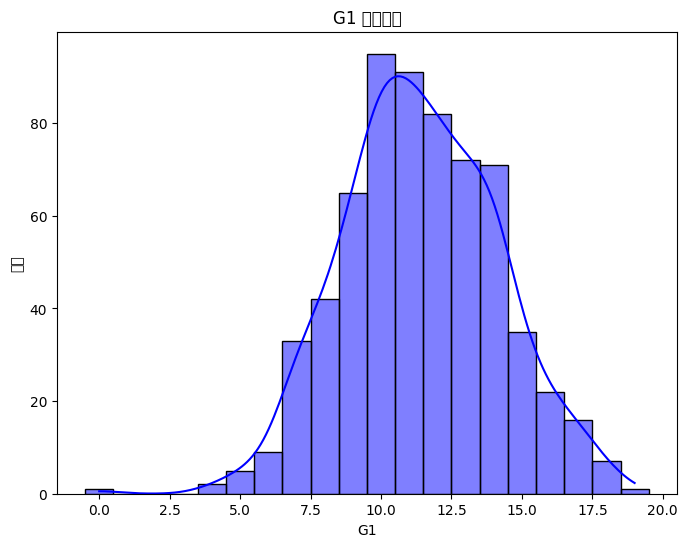

Shapiro-Wilk 檢驗 - 統計值: 0.9855360984802246, p-值: 4.9233394747716375e-06
G1 不是正態分佈。
獨立樣本 t-測試 - t-統計值: -2.662594513903567, p-值: 0.00794686964972506
性別與 G1 之間存在顯著關聯。


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind

# draw the density plot of G1 and perform normality tests to check if it is
# approximately normally distributed. Then, perform a proper bivariate test to
# check whether sex is associated with G1 (the significant level is 0.05)

# 繪製 G1 的密度圖
plt.figure(figsize=(8, 6))
sns.histplot(student_por_df['G1'], kde=True, color='blue')
plt.title('G1 的密度圖')
plt.xlabel('G1')
plt.ylabel('密度')
plt.show()

# 執行正態性檢驗（Shapiro-Wilk）
stat, p_value = shapiro(student_por_df['G1'])
print(f"Shapiro-Wilk 檢驗 - 統計值: {stat}, p-值: {p_value}")

# 根據 p-值檢查正態性
if p_value > 0.05:
    print("G1 近似為正態分佈。")
else:
    print("G1 不是正態分佈。")

# 執行雙變量測試（t-測試），檢查性別與 G1 之間的關聯
male_g1 = student_por_df[student_por_df['sex'] == 'M']['G1']
female_g1 = student_por_df[student_por_df['sex'] == 'F']['G1']

# 執行獨立樣本 t-測試
t_stat, p_value_ttest = ttest_ind(male_g1, female_g1)

# 根據 p-值檢查顯著性
print(f"獨立樣本 t-測試 - t-統計值: {t_stat}, p-值: {p_value_ttest}")

if p_value_ttest < 0.05:
    print("性別與 G1 之間存在顯著關聯。")
else:
    print("性別與 G1 之間不存在顯著關聯。")

In [31]:
# Please create a function rmse(y_true, y_pred), which computes the RMSE of
# the model prediction

import numpy as np

def rmse(y_true, y_pred):
    """
    計算真實值和預測值之間的均方根誤差（RMSE）。

    參數：
    - y_true: 類似陣列，形狀 (n_samples,)
        真實值。
    - y_pred: 類似陣列，形狀 (n_samples,)
        預測值。

    返回：
    - float
        RMSE 值。
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if len(y_true) != len(y_pred):
        raise ValueError("y_true 和 y_pred 的長度必須相同。")

    mse = np.mean((y_true - y_pred)**2)
    rmse_value = np.sqrt(mse)

    return rmse_value

# example
真實值 = [2, 4, 5, 4, 5]
預測值 = [1.8, 4.2, 4.9, 3.8, 5.2]

rmse_score = rmse(真實值, 預測值)
print(f"RMSE: {rmse_score}")

RMSE: 0.1843908891458578


In [33]:
# Please split the data into training (70%) and testing (30%) sets with a random
# seed 0, and train models to predict the outcome/target G1. (Note that you
# should rescale the data if needed). Use any statistical learning and feature
# selection techniques to create a better model with low testing RMSE. Please
# report both the training and the testing RMSE of your models. Note that your
# testing RMSE must be at least lower than 2.35

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# 資料預處理
X = student_por_df.drop('G1', axis=1)  # 特徵
y = student_por_df['G1']  # 目標

# 將類別變數轉換為虛擬變數
X = pd.get_dummies(X)

# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 特徵縮放，這裡使用標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 預測訓練集和測試集
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 計算 RMSE
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

print(f"訓練集 RMSE: {train_rmse}")
print(f"測試集 RMSE: {test_rmse}")

# 檢查測試 RMSE 是否低於 2.35
if test_rmse < 2.35:
    print("模型的測試集 RMSE 符合要求。")
else:
    print("請調整模型以達到更低的測試集 RMSE。")

訓練集 RMSE: 2.0626248801113163
測試集 RMSE: 6583563747280.133
請調整模型以達到更低的測試集 RMSE。
